___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 


* https://archive.ics.uci.edu/ml/datasets/heart+disease

# Import esential Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [22]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

# Ingest the data to notebook

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000,-0.098,-0.069,0.279,0.214,0.121,-0.116,-0.399,0.097,0.210,-0.169,0.276,0.068,-0.225
sex,-0.098,1.000,-0.049,-0.057,-0.198,0.045,-0.058,-0.044,0.142,0.096,-0.031,0.118,0.210,-0.281
cp,-0.069,-0.049,1.000,0.048,-0.077,0.094,0.044,0.296,-0.394,-0.149,0.120,-0.181,-0.162,0.434
trestbps,0.279,-0.057,0.048,1.000,0.123,0.178,-0.114,-0.047,0.068,0.193,-0.121,0.101,0.062,-0.145
chol,0.214,-0.198,-0.077,0.123,1.000,0.013,-0.151,-0.010,0.067,0.054,-0.004,0.071,0.099,-0.085
fbs,0.121,0.045,0.094,0.178,0.013,1.000,-0.084,-0.009,0.026,0.006,-0.060,0.138,-0.032,-0.028
restecg,-0.116,-0.058,0.044,-0.114,-0.151,-0.084,1.000,0.044,-0.071,-0.059,0.093,-0.072,-0.012,0.137
thalach,-0.399,-0.044,0.296,-0.047,-0.010,-0.009,0.044,1.000,-0.379,-0.344,0.387,-0.213,-0.096,0.422
exang,0.097,0.142,-0.394,0.068,0.067,0.026,-0.071,-0.379,1.000,0.288,-0.258,0.116,0.207,-0.437
oldpeak,0.210,0.096,-0.149,0.193,0.054,0.006,-0.059,-0.344,0.288,1.000,-0.578,0.223,0.210,-0.431


In [6]:
df.corr()[['target']]

,target
age,-0.225
sex,-0.281
cp,0.434
trestbps,-0.145
chol,-0.085
fbs,-0.028
restecg,0.137
thalach,0.422
exang,-0.437
oldpeak,-0.431


<AxesSubplot:>

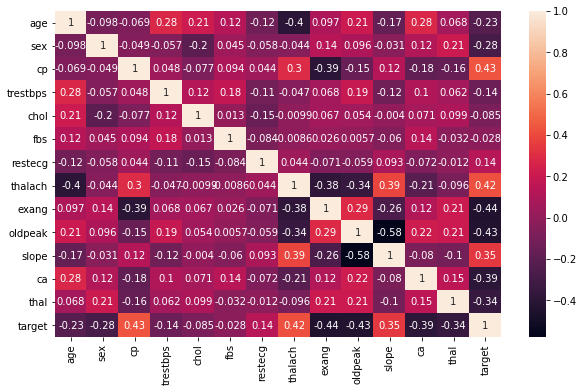

In [9]:
sns.heatmap(df.corr(), annot=True)

In [10]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

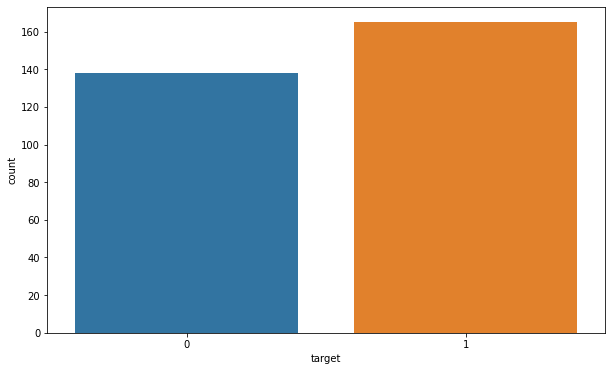

In [11]:
sns.countplot(df.target)

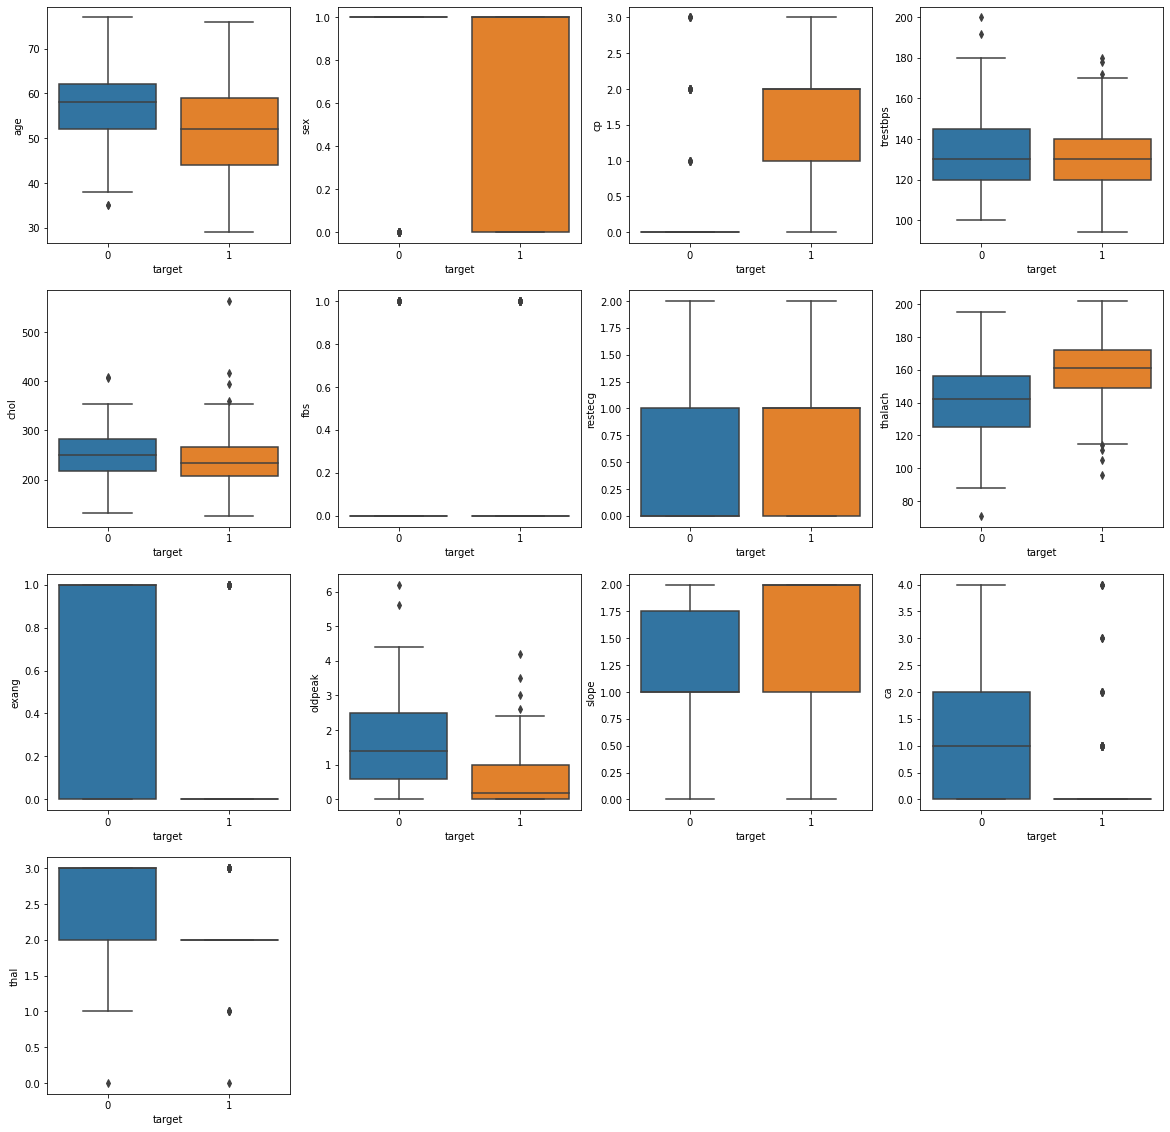

In [13]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "target":
        index += 1
        plt.subplot(4,4,index)
        sns.boxplot(x='target',y=feature,data=df)

<AxesSubplot:>

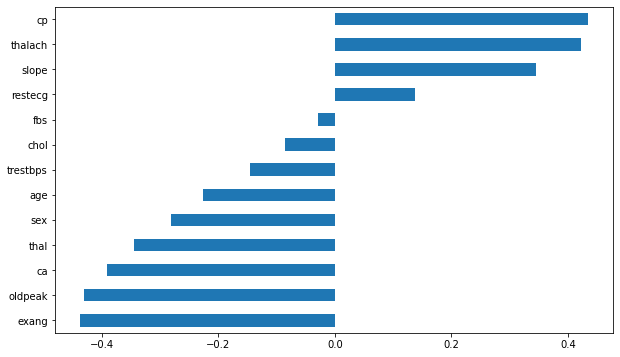

In [14]:
df.corr()["target"].drop("target").sort_values().plot.barh()

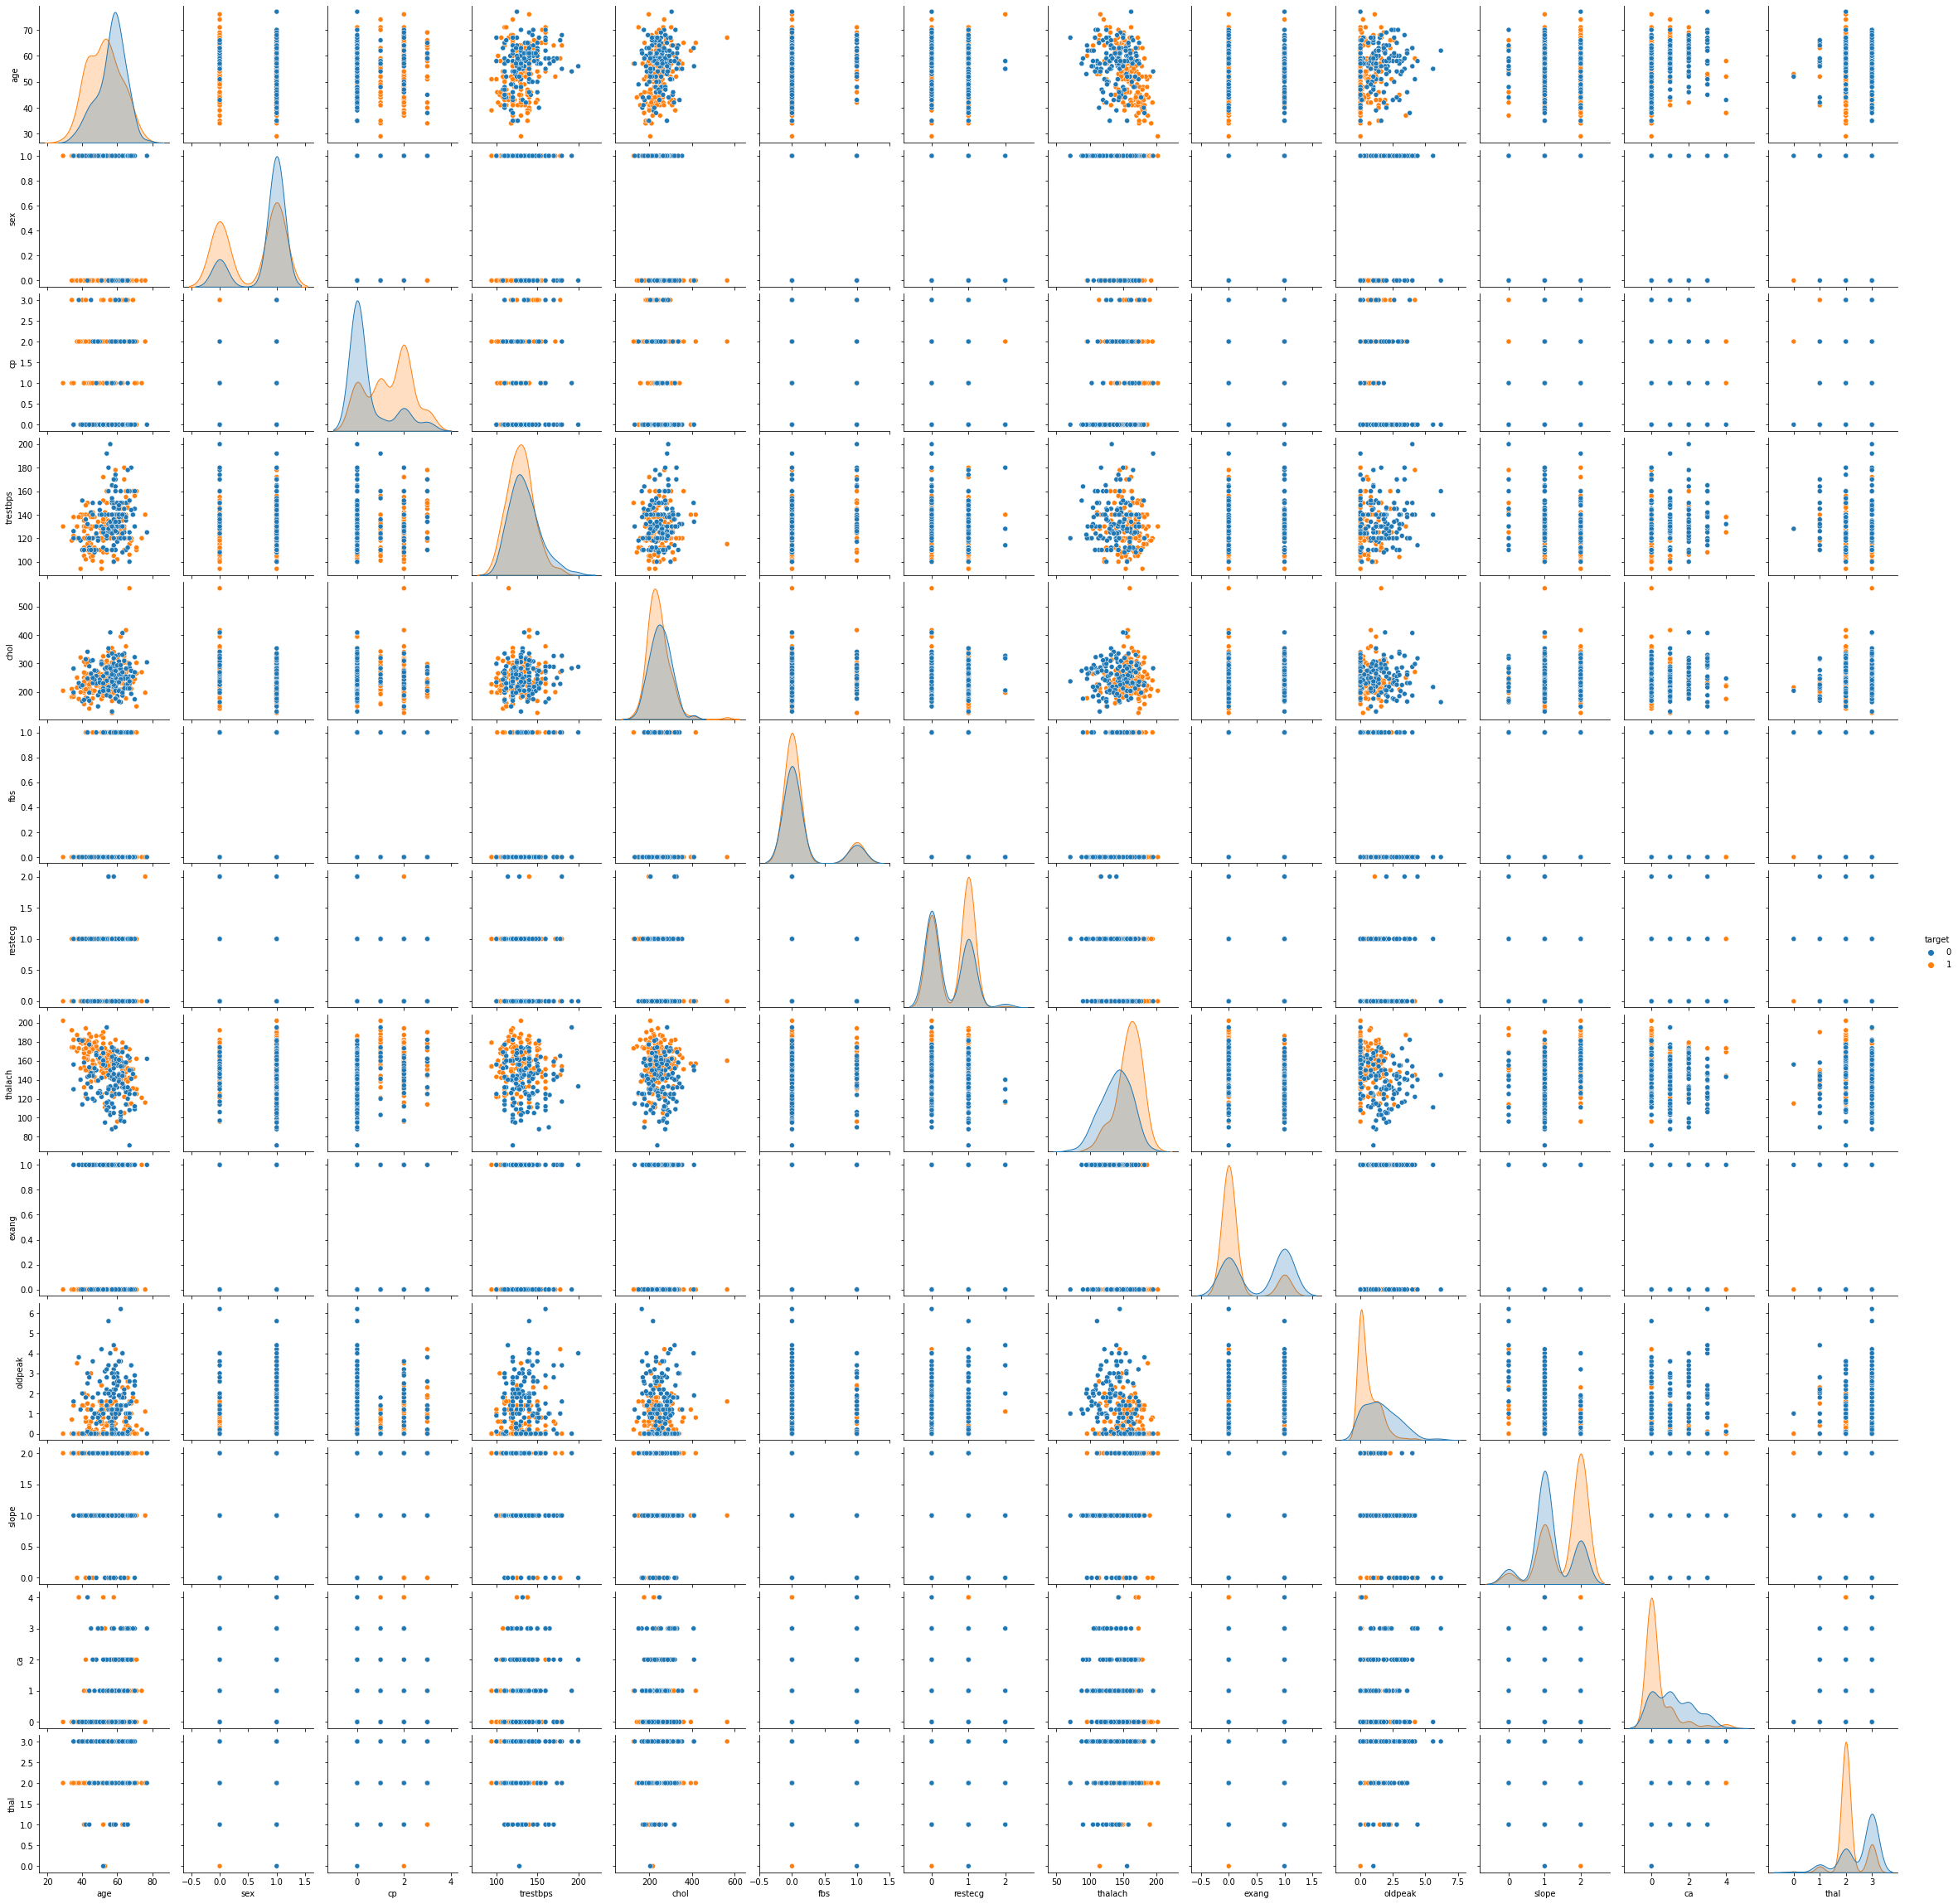

In [15]:
sns.pairplot(df, hue='target')

# Data Preprocessing

In [16]:
X = df.drop('target', axis=1)
y = df.target

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

In [19]:
scaler = StandardScaler()

In [20]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement Logistic Regression and Evaluate

In [21]:
from sklearn.linear_model import LogisticRegression

In [23]:
model = LogisticRegression()

In [24]:
penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
class_weight= ["balanced", None] 
# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies 
# in the input data
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}


grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall",   #f1_0 = make_scorer(f1_score, pos_label =0)
                          n_jobs = -1)

In [25]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='recall')

In [26]:
grid_model.best_params_

{'C': 0.1, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}

In [28]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

In [29]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[25  4]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61


Train_Set
[[ 83  26]
 [  9 124]]
              precision    recall  f1-score   support

           0       0.90      0.76      0.83       109
           1       0.83      0.93      0.88       133

    accuracy                           0.86       242
   macro avg       0.86      0.85      0.85       242
weighted avg       0.86      0.86      0.85       242



In [69]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.025,0.008,0.706,0.857,0.774,0.720
2,0.008,0.003,0.786,0.786,0.786,0.760
3,0.005,0.006,0.929,0.929,0.929,0.917
4,0.008,0.010,0.857,0.923,0.889,0.875
5,0.014,0.005,0.769,0.769,0.769,0.750
6,0.013,0.005,0.706,0.923,0.800,0.750
7,0.010,0.006,0.800,0.923,0.857,0.833
8,0.005,0.005,0.857,0.923,0.889,0.875
9,0.009,0.011,0.800,0.615,0.696,0.708
10,0.014,0.005,0.857,0.923,0.889,0.875


In [70]:
df_scores.mean()[2:]

test_precision   0.807
test_recall      0.857
test_f1          0.828
test_accuracy    0.806
dtype: float64

# Implement KNN and Evaluate

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn_grid = KNeighborsClassifier()

In [33]:
k_values= range(1,30)

In [34]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}

In [35]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')

In [36]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [37]:
knn_grid_model.best_params_

{'n_neighbors': 26, 'p': 1, 'weights': 'uniform'}

In [38]:
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[26  3]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61


Train_Set
[[ 81  28]
 [ 11 122]]
              precision    recall  f1-score   support

           0       0.88      0.74      0.81       109
           1       0.81      0.92      0.86       133

    accuracy                           0.84       242
   macro avg       0.85      0.83      0.83       242
weighted avg       0.84      0.84      0.84       242



In [47]:
from sklearn.metrics import accuracy_score

In [48]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    
    test_error_rates.append(test_error)

Text(0, 0.5, 'Error Rate')

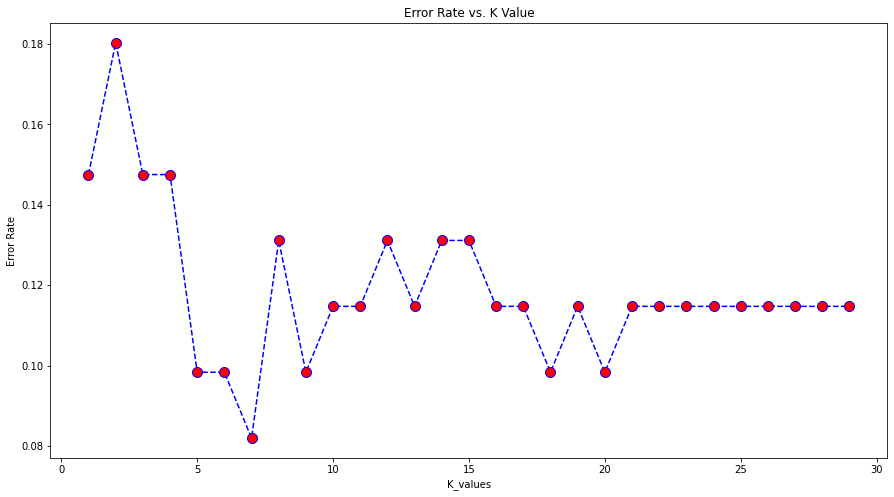

In [49]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

In [66]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_scaled,y_train)
print('WITH K=5\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=5

Test_Set
[[27  2]
 [ 4 28]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61


Train_Set
[[ 87  22]
 [ 13 120]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       109
           1       0.85      0.90      0.87       133

    accuracy                           0.86       242
   macro avg       0.86      0.85      0.85       242
weighted avg       0.86      0.86      0.85       242



In [67]:
scores = cross_validate(knn, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.003,0.011,0.760,0.750,0.857,0.800
2,0.002,0.006,0.840,0.857,0.857,0.857
3,0.001,0.008,0.833,0.917,0.786,0.846
4,0.002,0.009,0.750,0.769,0.769,0.769
5,0.002,0.012,0.792,0.786,0.846,0.815
6,0.002,0.011,0.792,0.786,0.846,0.815
7,0.002,0.010,0.708,0.667,0.923,0.774
8,0.002,0.013,0.833,0.800,0.923,0.857
9,0.001,0.006,0.792,0.833,0.769,0.800
10,0.002,0.008,0.833,0.846,0.846,0.846


In [68]:
df_scores.mean()[2:]

test_accuracy    0.793
test_precision   0.801
test_recall      0.842
test_f1          0.818
dtype: float64

In [50]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train_scaled,y_train)
print('WITH K=7\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=7

Test_Set
[[27  2]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61


Train_Set
[[ 87  22]
 [ 10 123]]
              precision    recall  f1-score   support

           0       0.90      0.80      0.84       109
           1       0.85      0.92      0.88       133

    accuracy                           0.87       242
   macro avg       0.87      0.86      0.86       242
weighted avg       0.87      0.87      0.87       242



In [52]:
from sklearn.model_selection import cross_val_score, cross_validate

In [53]:
scores = cross_validate(knn, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.002,0.010,0.720,0.733,0.786,0.759
2,0.003,0.007,0.800,0.800,0.857,0.828
3,0.002,0.010,0.917,0.929,0.929,0.929
4,0.002,0.009,0.750,0.733,0.846,0.786
5,0.002,0.006,0.833,0.800,0.923,0.857
6,0.002,0.011,0.750,0.733,0.846,0.786
7,0.002,0.008,0.708,0.688,0.846,0.759
8,0.003,0.007,0.792,0.786,0.846,0.815
9,0.003,0.011,0.750,0.818,0.692,0.750
10,0.002,0.011,0.875,0.857,0.923,0.889


In [54]:
df_scores.mean()[2:]

test_accuracy    0.789
test_precision   0.788
test_recall      0.849
test_f1          0.816
dtype: float64

In [55]:
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train_scaled,y_train)
print('WITH K=9\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=9

Test_Set
[[27  2]
 [ 4 28]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61


Train_Set
[[ 86  23]
 [ 12 121]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       109
           1       0.84      0.91      0.87       133

    accuracy                           0.86       242
   macro avg       0.86      0.85      0.85       242
weighted avg       0.86      0.86      0.85       242



In [56]:
scores = cross_validate(knn, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.003,0.011,0.760,0.750,0.857,0.800
2,0.002,0.009,0.800,0.800,0.857,0.828
3,0.003,0.008,0.875,0.867,0.929,0.897
4,0.002,0.010,0.750,0.733,0.846,0.786
5,0.001,0.006,0.833,0.800,0.923,0.857
6,0.001,0.011,0.792,0.750,0.923,0.828
7,0.001,0.007,0.750,0.733,0.846,0.786
8,0.002,0.008,0.833,0.846,0.846,0.846
9,0.002,0.010,0.833,0.846,0.846,0.846
10,0.002,0.008,0.833,0.846,0.846,0.846


In [59]:
df_scores.mean()[2:]

test_accuracy    0.806
test_precision   0.797
test_recall      0.872
test_f1          0.832
dtype: float64

In [60]:
knn = KNeighborsClassifier(n_neighbors=26)

knn.fit(X_train_scaled,y_train)
print('WITH K=26\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=26

Test_Set
[[25  4]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61


Train_Set
[[ 78  31]
 [ 11 122]]
              precision    recall  f1-score   support

           0       0.88      0.72      0.79       109
           1       0.80      0.92      0.85       133

    accuracy                           0.83       242
   macro avg       0.84      0.82      0.82       242
weighted avg       0.83      0.83      0.82       242



In [61]:
scores = cross_validate(knn, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.002,0.011,0.760,0.722,0.929,0.813
2,0.002,0.010,0.800,0.800,0.857,0.828
3,0.002,0.009,0.875,0.867,0.929,0.897
4,0.003,0.007,0.833,0.765,1.000,0.867
5,0.002,0.010,0.833,0.800,0.923,0.857
6,0.001,0.011,0.750,0.684,1.000,0.813
7,0.002,0.008,0.833,0.800,0.923,0.857
8,0.007,0.010,0.917,0.867,1.000,0.929
9,0.006,0.012,0.750,0.733,0.846,0.786
10,0.003,0.010,0.792,0.786,0.846,0.815


In [62]:
df_scores.mean()[2:]

test_accuracy    0.814
test_precision   0.782
test_recall      0.925
test_f1          0.846
dtype: float64

# Visually compare models based on your chosen metric

In [39]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve

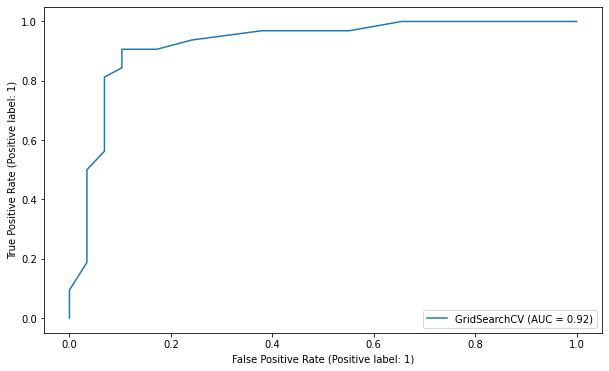

In [40]:
plot_roc_curve(knn_grid_model, X_test_scaled, y_test)

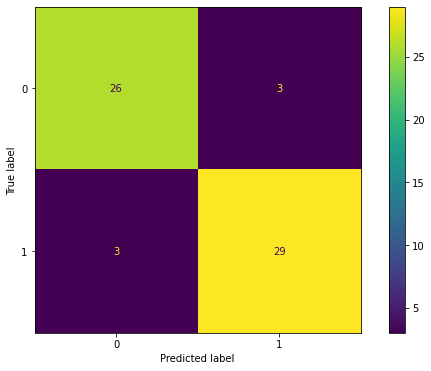

In [63]:
plot_confusion_matrix(knn_grid_model,X_test_scaled, y_test )

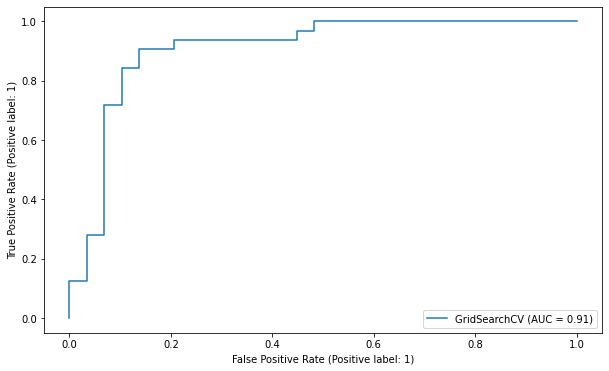

In [41]:
plot_roc_curve(grid_model, X_test_scaled, y_test)

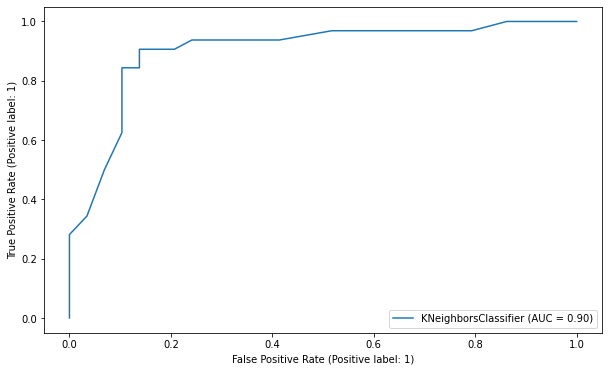

In [64]:
plot_roc_curve(knn, X_test_scaled, y_test)

In [72]:
model.fit(X_train_scaled, y_train)

LogisticRegression()

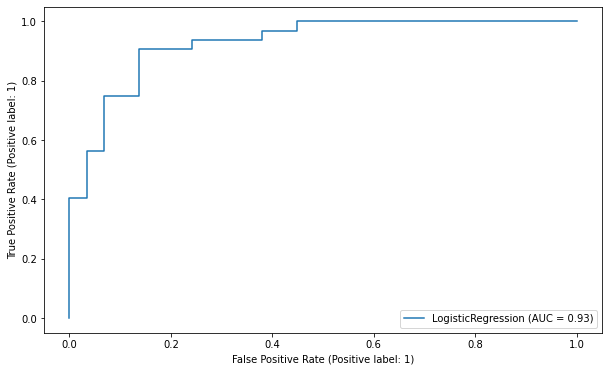

In [73]:
plot_roc_curve(model, X_test_scaled, y_test)

{'C': 0.1, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}

In [74]:
model_bestparam = LogisticRegression(C= 0.1, class_weight= 'None',penalty= 'l1',solver= 'saga').fit(X_train_scaled, y_train)

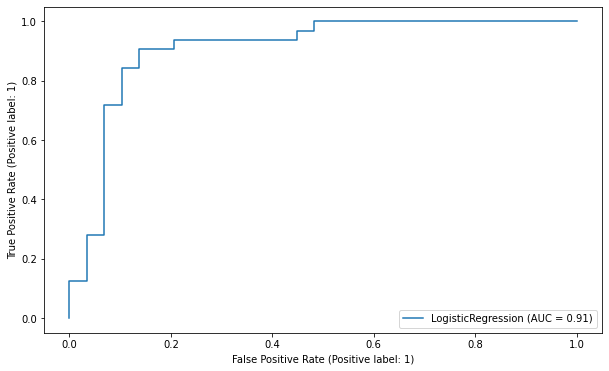

In [75]:
plot_roc_curve(model_bestparam, X_test_scaled, y_test)

# Chose best model and make a random prediction 

In [42]:
import pickle

In [43]:
scaler = StandardScaler()

In [44]:
scaler.fit(X)

StandardScaler()

In [76]:
pickle.dump(scaler, open("scaler_heart_stroke", 'wb'))

In [45]:
X_scaled = scaler.transform(X)

In [77]:
final_model = LogisticRegression(C= 0.1, class_weight= 'None',penalty= 'l1',solver= 'saga').fit(X_scaled, y)

In [78]:
pickle.dump(final_model, open("final_model_heartstroke", 'wb'))

In [79]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.000,54.366,9.082,29.000,47.500,55.000,61.000,77.000
sex,303.000,0.683,0.466,0.000,0.000,1.000,1.000,1.000
cp,303.000,0.967,1.032,0.000,0.000,1.000,2.000,3.000
trestbps,303.000,131.624,17.538,94.000,120.000,130.000,140.000,200.000
chol,303.000,246.264,51.831,126.000,211.000,240.000,274.500,564.000
fbs,303.000,0.149,0.356,0.000,0.000,0.000,0.000,1.000
restecg,303.000,0.528,0.526,0.000,0.000,1.000,1.000,2.000
thalach,303.000,149.647,22.905,71.000,133.500,153.000,166.000,202.000
exang,303.000,0.327,0.470,0.000,0.000,0.000,1.000,1.000
oldpeak,303.000,1.040,1.161,0.000,0.000,0.800,1.600,6.200


In [80]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2


In [81]:
my_dict = { 'age' : [21, 35, 60],
'sex' : [1,0,1],
'cp' : [0,1,2],
'trestbps' : [120, 130, 135],
'chol' : [235, 250, 300],
'fbs' : [0, 1, 0],
'restecg' : [0, 0, 0],
'thalach' : [187, 172, 160],
'exang' : [0,0,1],
'oldpeak' : [2.3, 1.9, 0.9],
'slope' : [0, 0, 2],
'ca' : [0, 0, 0],
'thal' : [1 ,1 ,1]

}

In [82]:
sample = pd.DataFrame(my_dict)
sample

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,21,1,0,120,235,0,0,187,0,2.300,0,0,1
1,35,0,1,130,250,1,0,172,0,1.900,0,0,1
2,60,1,2,135,300,0,0,160,1,0.900,2,0,1


In [83]:
scaler_hearts = pickle.load(open("scaler_heart_stroke", "rb"))

In [84]:
sample_scaled = scaler_hearts.transform(sample)
sample_scaled

array([[-3.67993411,  0.68100522, -0.93851463, -0.66386682, -0.21768274,
        -0.41763453, -1.00583187,  1.63347147, -0.69663055,  1.08733806,
        -2.27457861, -0.71442887, -2.14887271],
       [-2.13589054, -1.46841752,  0.03203122, -0.09273778,  0.07219949,
         2.394438  , -1.00583187,  0.97751389, -0.69663055,  0.74225984,
        -2.27457861, -0.71442887, -2.14887271],
       [ 0.62133012,  0.68100522,  1.00257707,  0.19282673,  1.03847361,
        -0.41763453, -1.00583187,  0.45274783,  1.43548113, -0.12043572,
         0.97635214, -0.71442887, -2.14887271]])

In [85]:
final_model = pickle.load(open("final_model_heartstroke", "rb"))

In [86]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)


In [87]:
sample["pred_proba"] = predictions_proba[:,1]
sample["pred_0.50"] = predictions
sample

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,pred_proba,pred_0.50
0,21,1,0,120,235,0,0,187,0,2.300,0,0,1,0.598,1
1,35,0,1,130,250,1,0,172,0,1.900,0,0,1,0.831,1
2,60,1,2,135,300,0,0,160,1,0.900,2,0,1,0.797,1
